In [80]:
import numpy as np 
import random 
import time
import pylab as plt

Questo programma è una simulazione del monty hall problem. Ci sono 3 giocatori e un conduttore in un programma TV. 
Il conduttore mostra ai giocatori 3 porte, dietro una di queste porte si cela una lamborghini, dietro le altre 2 ci sono delle capre. Il primo giocatore sceglie una porta e mantiene tale scelta fino alla fine. Il secondo giocatore sceglie una porta ma, dopo che il conduttore gli apre una porta dietro la quale c'è una capra, decide di cambiare idea. Il terzo giocatore entra nella stanza solo dopo che il conduttore ha aperto una porta con dietro la capra. 
la simulazione mostra le probabilità di vittoria di questi 3 giocatori. In seguito viene eseguita una simulazione analoga ma con 100 porte, per cui il conduttore ne apre 98 dopo che il giocatore ha effettuato la scelta. 

In [2]:
#questa funzione restituisce il numero della porta che viene aperta dal terzo giocatore, 
#è una scelta random, escludendo solo la porta già aperta dal conduttore 

def funz(lamb, porte):
    rand=random.randrange(1,porte+1)
    if (rand!=lamb):
        apert=rand
    else:
        while(rand==lamb):
            rand=random.randrange(1,porte+1)
        apert=rand          
    return(apert)
    

In [3]:
#la funzione restituisce il numero della porta diversa da num1 e num2

def change(num1,num2, porte):
    it=0
    while (it==0):
        gen=random.randrange(1,porte+1)
        if (gen!=num1):
            if (gen!=num2):
                it=1
    return(gen)

In [4]:
def elimina_elementi(vettore1, vettore2):
    risultato = []
    indice_vettore2 = 0
    for elemento in vettore1:
        if indice_vettore2 >= len(vettore2) or vettore2[indice_vettore2] == 0:
            risultato.append(elemento)
        else:
            indice_vettore2 += 1
    return risultato

In [5]:
def filtra_vettore(vettore1, vettore2):
    vettore_filtrato = []
    for i in range(len(vettore1)):
        if vettore2[i] != 0:
            vettore_filtrato.append(vettore1[i])
    return vettore_filtrato


In [6]:
vettore1=[1, 2, 3, 4, 5, 6, 7]
vettore2=[0, 1, 1, 0, 0, 0, 0]
filtra_vettore(vettore1,vettore2)

[2, 3]

In [7]:
# questa funzione chiude N-2 porte con dietro le capre
def chiusura_porte (pos_lamb, pos_scelta_giocatore, N):
    tot_porte=[]
    remove=[]
    
    for i in range (0,N):
        tot_porte.append(i+1)
    for k in range (0,N):
        if (tot_porte[k]==pos_lamb or tot_porte[k]==pos_scelta_giocatore):
                remove.append(1)
                   
        else:
            remove.append(0)
   
    t=0
    j=0
    while (t==0):
        if (remove[j]==0):
            remove[j]=1
            t=1
        j=j+1
        
    vett_fin=filtra_vettore(tot_porte, remove)
    if (np.size(vett_fin)==1):
        if(vett_fin[0]==1):
            vett_fin.append(2)
        
        else:
            vett_fin.append(1) 
    if (np.size(vett_fin)==2):
            vett_fin.append(3)
        
    return vett_fin
   
            
        
        

In [8]:
def change_n(num1,num2, arr):
    for element in arr:
        if (element!=num1):
             if (element!=num2):
                return(element)

                
        

In [9]:
chiusura_porte(1,1,5)

[1, 2, 3]

In [10]:
change_n(3,4,chiusura_porte(3,4,5))

1

In [56]:
#simulazione dei 3 players con N porte
def simulazione (N):
    capra_cond=[]    #nuomero della porta con dietro la capra aperta dal conduttore
    first_choice=[]  #numero della prima porta scelta
    second_choice=[]  #posizione della porta aperta dopo aver cambiato scelta
    lamborghini=[]    # numero della porta con dietro la lamborghini
    giocatore3=[]
    won_1=0
    won_2=0
    won_3=0
    porte_finali=[]
    for i in range(0, 100000):
        
        lamborghini.append(random.randrange(1,N+1))
       # print('posizione lamb',lamborghini[i])
        random.seed ( i )
        first_choice.append(random.randrange(1,N+1))
       # print('prima scelta',first_choice[i])
        porte_finali.append(chiusura_porte(lamborghini[i], first_choice[i], N))
       # print('porte finali:', porte_finali[i])
        capra_cond.append(change_n(lamborghini[i], first_choice[i],porte_finali[i]))
       # print('capra aperta dal cond',capra_cond[i])
        second_choice.append(change_n(first_choice[i], capra_cond[i], porte_finali[i]))
       # print('seconda scelta',second_choice[i])
        if (first_choice[i]==lamborghini[i]):
            won_1=won_1+1
            #print('primo giocatore vince','\n')
        if (second_choice[i]==lamborghini[i]):
            won_2=won_2+1
           # print('secondo giocatore vince','\n')
    
          #il primo giocatore mantiene la scelta 
    
        
    return (won_1/100000, won_2/100000)
    #il terzo giocatore entra e fa la sua scelta indipendentemente
    
    
    


    
    

In [69]:
simulazione(3)

(0.33191, 0.66809)

In [97]:
simulazioni=[]
sim=[]
i=3
while (i<30):
    simulazioni.append(simulazione(i)[1])
    i=i+1

In [98]:
porte=[]
for i in range (3, 30):
    porte.append(i)

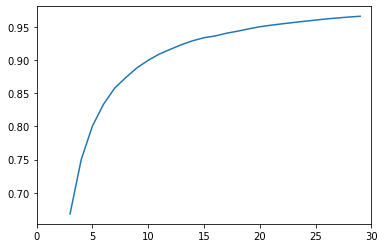

In [101]:
plt.xlim(0,30)
#plt.ylim(0,1)
plt.plot(porte,simulazioni)

In [18]:
#inizializzo le liste

capra_cond=[]    #nuomero della porta con dietro la capra aperta dal conduttore
first_choice=[]  #numero della prima porta scelta
second_choice=[]  #posizione della porta aperta dopo aver cambiato scelta
lamborghini=[]    # numero della porta con dietro la lamborghini
giocatore3=[]


for i in range(0, 100000):
    
    #dietro questa porta c'è la lamborgini, dietro le altre due ci sono le capre
    lamborghini.append(random.randrange(1,4))
    #print('lamborghini:', lamborghini[i], '\n')
   
    #ora il primo giogatore sceglie una delle tre porte e mantiene la scelta fino alla fine
    random.seed ( i )
   
    first_choice.append(random.randrange(1,4))
    
    
    #il conduttore apre una delle due porte in cui c'è la capra 
    capra_cond.append(change(lamborghini[i], first_choice[i],3))
    
    
    #a questo punto il secondo giocatore sceglie di cambiare porta
    second_choice.append(change(first_choice[i], capra_cond[i], 3))
    
    #il primo giocatore mantiene la scelta 
    
    
    #il terzo giocatore entra e fa la sua scelta indipendentemente
    giocatore3.append(funz(capra_cond[i],3))
    


In [20]:
#inizializzo le vincite dei giocatori
won_player_1=0
won_player_2=0
won_player_3=0

for i in range(0,100000):
    if(second_choice[i]==lamborghini[i]):
            won_player_2=won_player_2+1
print('probabilità che cambiando scelta il giocarore vinca:',won_player_2/100000)

for i in range(0,100000):
    if(first_choice[i]==lamborghini[i]):
            won_player_1=won_player_1+1
print('probabilità che non cambiando scelta il giocatore vinca:', won_player_1/100000)   

for i in range(0,100000):
    if(giocatore3[i]==lamborghini[i]):
            won_player_3=won_player_3+1
print('probabilità che vinca il terzo giocatore:', won_player_3/100000)   

probabilità che cambiando scelta il giocarore vinca: 0.66432
probabilità che non cambiando scelta il giocatore vinca: 0.33568
probabilità che vinca il terzo giocatore: 0.49974


In [50]:
#ora faccio la stessa simulazione ma considerando 1000 perte 

porta_chiusa=[] #unica porta che il conduttore lascia chiusa dopo che il giocatore ha effettuato la scelta   
first_choice=[]  #numero della prima porta scelta
second_choice=[] #numero della seconda porta scelta
porte_aperte=[]
lamborghini=[]    # numero della porta con dietro la lamborghini



for i in range(0, 1000):
    
    #dietro questa porta c'è la lamborgini, dietro le altre ci sono le capre
    lamborghini.append(random.randrange(1,1001))
   # print(lamborghini[i],'\n')
    random.seed ( i )
    #il primo giocatore fa la sua scelta e non cambia idea
    first_choice.append(random.randrange(1,1001))
   # print(first_choice[i],'\n')
    
    #il conduttore apre 998 porte con dietro le capre,
    #rimangono chiuse solo quella con dietro la lamborghini e un'altra porta random
    
    if (lamborghini[i]==first_choice[i]):
        porta_chiusa.append(change(lamborghini[i], first_choice[i],1000))
    else:
        porta_chiusa.append(first_choice[i])
    temporaneo=[]
    temporaneo[0]=porta_chiusa[i]# questa porta continene la prima scelta oppure una capra 
    temporaneo[1]=lamborghini[i] # questa porta contiene sempre la lamborghini
    second_choice.append(change(first_choice[i], capra_cond[i], 3))
    
    #print(porta_chiusa[i],'\n')
    
    #a questo punto il secondo giocatore decide di cambiare scelta
    #second_choice.append(change(first_choice[i], porte_aperte[i], 3))
       
    
    
    
    
    #il terzo giocatore entra e fa la sua scelta indipendentemente
   # giocatore3.append(funz(capra_cond[i]))
    #print('giocatore 3 sceglie:', giocatore3[i], '\n')



In [44]:
#inizializzo le vincite dei giocatori
won_player_1=0
won_player_2=0
won_player_3=0

for i in range(0,100000):
    if(first_choice[i]==lamborghini[i]):
            won_player_1=won_player_1+1
print('probabilità che non cambiando scelta il giocatore vinca:', won_player_1/100000)  

for i in range(0,100000):
    if(second_choice[i]==lamborghini[i]):
            won_player_2=won_player_2+1
print('probabilità che cambiando scelta il giocarore vinca:',won_player_2/100000)



probabilità che cambiando scelta il giocarore vinca: 0.00094
probabilità che non cambiando scelta il giocatore vinca: 0.00119


In [22]:
print('probabilità di vincere non cambiando scelta: ', won_first_player/100000, '\n')
print('probabilità di vincere cambiando scelta: ', won_second_player/100000, '\n')

probabilità di vincere non cambiando scelta:  0.001 

probabilità di vincere cambiando scelta:  0.999 

